# Logistic Regression

## Data Preprocessing

In [21]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

# Set working directory
month_file = '4_August'
# Set working directory
os.chdir("/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/By month/"+month_file+"/Ending Balances/Per_Player")

In [22]:
# Load original dataset
dataset = pd.read_parquet('per_player_ending_balance_by_session_ALL.parquet')

print(dataset.columns)

Index(['playerkey', 'session_time', 'gender', 'age_range', 'age_gen',
       'beginning_amt', 'ending_amt', 'ending_balance', 'ave_slotdenom',
       'std_slotdenom', 'min_slotdenom', 'max_slotdenom', 'ave_theo_payback',
       'min_theo_payback', 'max_theo_payback', 'ave_wageramt', 'std_wageramt',
       'min_wager', 'max_wager', 'ave_p/b', 'std_p/b', 'max_p/b', 'max_profit',
       'depletion_slope', '#inc_maxbet', '#dec_maxbet', 'first_wager',
       'first_outcome', 'first_p/b', 'last_wager', 'last_outcome', 'last_p/b',
       '#W', '#L', '#NH', '#D', 'w/min', 'l/min', 'nh/min', 'd/min', 'w/g',
       'l/g', 'nh/g', 'd/g', '#2ws', '2ws_profit', '2ws_wgramt', '#3ws',
       '3ws_profit', '3ws_wgramt', '#4ws', '4ws_profit', '4ws_wgramt',
       '2ws/min', '3ws/min', '4ws/min', 'ave_time_per_gamble',
       'min_time_per_gamble', 'max_time_per_gamble', 'total_duration',
       'total_gambles', 'machines_changes', '#inc_slotdenom', '#dec_slotdenom',
       'unique_machines', 'ave_time_

## Load Dataframes

In [23]:
# Filter Columns
filter = ['session_time', 'gender', 'age_gen', 'first_outcome',
        'first_wager','first_p/b', 'last_outcome', 'last_wager', 'last_p/b',
        'beginning_amt', 'ending_amt', 'ending_balance', 'ave_slotdenom', 
        'std_slotdenom', 'min_slotdenom', 'max_slotdenom', 'ave_theo_payback',
        'min_theo_payback', 'max_theo_payback', 'ave_wageramt', 'std_wageramt',
        'min_wager', 'max_wager', 'ave_p/b', 'std_p/b', 'max_p/b', 'max_profit', 'depletion_slope', 
        '#inc_slotdenom', '#dec_slotdenom', '#inc_maxbet', '#dec_maxbet', 
        'w/min', 'l/min', '2ws/min', '3ws/min', '4ws/min',
        'nh/min', 'd/min', 'w/g', 'l/g', 'nh/g', 'd/g', 'ave_time_per_gamble', 
        'min_time_per_gamble', 'max_time_per_gamble',
        'machines_changes', 'unique_machines', 'classification']

# Columns NOT INCLUDED
# 'playerkey', 'rank', 'age_range', '#W', '#L', '#NH', '#D', #2ws, #3ws, #4ws, 2ws_profit, 3ws_profit, 4ws_profit,
# 2ws_wgramt, 3ws_wgramt, 4ws_wgramt, ave_time_per_machine, 'total_duration', 'total_gambles'

# Load dataset
dataset = pd.read_parquet('per_player_ending_balance_by_session_ALL.parquet', columns=filter)

# Keep only session_time 1
dataset = dataset[dataset['session_time'] == 1]
# Drop age_range and playerkey
dataset = dataset.drop(['session_time'], axis=1)


# # Seperate dependent and independent variables
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Taking Care of Missing Data

X[:, 3:31] it covers from beggining account balance to 4ws_wgramt column

We do not need this step since we do not have missing data!

In [4]:
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# imputer.fit(X[:, 3:31])
# X[:, 3:31] = imputer.transform(X[:, 3:31])

## Encoding Categorical Data

### Encoding the Independent Variable

In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

# Econde gender column (Binary)
le = LabelEncoder()

# Binary Encode gender and simplay
X[:, 0] = le.fit_transform(X[:, 0])

In [26]:
# # Encode age_generartion, first_outoce, last_outcome columns
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1, 2, 5])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

### Encoding the Dependent Variable

In [27]:
y = le.fit_transform(y)

## Splitting the dataset into the Training set and Test set

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

## Feature Scaling

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# Scale all columns except the encoded ones
X_train[:, 14:] = sc.fit_transform(X_train[:, 14:])
X_test[:, 14:] = sc.transform(X_test[:, 14:])

## Training the Logistic Regression model on 

1.   X_train
2.   y_train

the Training set

In [30]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, max_iter=1000)
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

### Which IDVs have the most weight in the model

In [24]:
# Create a dictionary mapping column names to their index positions
column_index_mapping = {index: column_name for index, column_name in enumerate(dataset.columns)}

# Print the dictionary
print(column_index_mapping)


{0: 'gender', 1: 'age_gen', 2: 'first_outcome', 3: 'first_wager', 4: 'first_p/b', 5: 'last_outcome', 6: 'last_wager', 7: 'last_p/b', 8: 'beginning_amt', 9: 'ending_amt', 10: 'ending_balance', 11: 'ave_slotdenom', 12: 'std_slotdenom', 13: 'min_slotdenom', 14: 'max_slotdenom', 15: 'ave_theo_payback', 16: 'min_theo_payback', 17: 'max_theo_payback', 18: 'ave_wageramt', 19: 'std_wageramt', 20: 'min_wager', 21: 'max_wager', 22: 'ave_p/b', 23: 'std_p/b', 24: 'max_p/b', 25: 'max_profit', 26: 'depletion_slope', 27: '#inc_slotdenom', 28: '#dec_slotdenom', 29: '#inc_maxbet', 30: '#dec_maxbet', 31: 'w/min', 32: 'l/min', 33: '2ws/min', 34: '3ws/min', 35: '4ws/min', 36: 'nh/min', 37: 'd/min', 38: 'w/g', 39: 'l/g', 40: 'nh/g', 41: 'd/g', 42: 'ave_time_per_gamble', 43: 'min_time_per_gamble', 44: 'max_time_per_gamble', 45: 'machines_changes', 46: 'unique_machines', 47: 'classification'}


In [31]:
# Get the feature names after one-hot encoding
feature_names = ct.get_feature_names_out()

# Get the coefficients and feature importance
coefficients = classifier.coef_[0]
feature_importance = list(zip(feature_names, coefficients))

# Sort the feature importance by absolute coefficient values
feature_importance.sort(key=lambda x: abs(x[1]), reverse=True)

# Print the feature importance
for feature, importance in feature_importance:
    print(f"{feature}: {importance}")

remainder__x24: 11.34779124864665
remainder__x23: -8.310779890647588
remainder__x22: 2.970488452819621
remainder__x43: -1.4289984816847825
remainder__x44: 1.4190770943055413
remainder__x46: 1.0558787541997106
remainder__x42: -0.9087089725084012
remainder__x39: -0.8011198030578555
remainder__x40: -0.7662742852120265
remainder__x28: 0.6608173960239054
remainder__x19: -0.5814275819525977
remainder__x41: -0.5635010783572826
encoder__x1_Gen Z: -0.5129659106714969
remainder__x45: 0.5001693962575
remainder__x8: 0.46597142193161145
remainder__x38: -0.45400338151076036
remainder__x21: 0.45031590513643893
remainder__x25: 0.38671546209061247
remainder__x11: -0.38331960176262014
remainder__x15: 0.3270370140324015
remainder__x20: -0.32702082489596496
remainder__x31: 0.3232292966523206
remainder__x29: 0.3213265987523618
remainder__x12: 0.31898810786827964
remainder__x13: 0.31330550616457603
encoder__x1_Silent: 0.3118786040112435
remainder__x30: -0.29312733626524456
remainder__x10: -0.280616600765496

In [12]:
from sklearn.inspection import permutation_importance

result = permutation_importance(classifier, X_train, y_train, n_repeats=10, random_state=42)

# Get feature importances and feature names
importances = result.importances_mean
feature_names = ct.get_feature_names_out()

# Sort feature importances
feature_importance = list(zip(feature_names, importances))
feature_importance.sort(key=lambda x: x[1], reverse=True)

# Print feature importances
for feature, importance in feature_importance:
    print(f"{feature}: {importance}")

remainder__x24: 0.34163886572143454
remainder__x23: 0.17542743953294412
remainder__x22: 0.08444537114261888
remainder__x46: 0.08281901584653881
remainder__x39: 0.08047331109257717
remainder__x40: 0.06739991659716431
remainder__x44: 0.04748748957464556
remainder__x41: 0.03459132610508758
remainder__x43: 0.032183069224353676
remainder__x38: 0.02565679733110928
remainder__x42: 0.02551084236864054
remainder__x15: 0.01380316930775648
remainder__x20: 0.011415763135946643
remainder__x19: 0.011311509591326119
remainder__x21: 0.010195996663886587
remainder__x8: 0.009810258548790696
remainder__x10: 0.008976230191826539
remainder__x11: 0.00795454545454547
remainder__x13: 0.006140533778148494
remainder__x12: 0.004628857381150963
remainder__x28: 0.004608006672226872
remainder__x18: 0.004399499582985844
remainder__x3: 0.004180567139282753
remainder__x17: 0.0038365304420350356
remainder__x30: 0.0033778148457047743
remainder__x7: 0.003325688073394506
remainder__x27: 0.003085904920767335
remainder__x31

### Predicting the Test set results

In [13]:
y_pred = classifier.predict(X_test)

print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [2 2]
 [3 2]
 ...
 [1 0]
 [2 2]
 [2 3]]


### Making the Confusion Matrix and Accuracy Score

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred, average='macro'))
print('Recall: ', recall_score(y_test, y_pred, average='macro'))
print('F1 Score: ', f1_score(y_test, y_pred, average='macro'))

# Interpretation of confusion matrix
print('True Positive (B20): ', cm[0][0])
print('True Negative (T20): ', cm[1][1])
print('False Positive: ', cm[0][1])
print('False Negative: ', cm[1][0])

[[446 134  46  12]
 [108 283 175  42]
 [  6  94 321 160]
 [  0   3  88 481]]
Accuracy:  0.6381825760733639
Precision:  0.6371555923687954
Recall:  0.6394812188568544
F1 Score:  0.6346112184043042
True Positive (B20):  446
True Negative (T20):  283
False Positive:  134
False Negative:  108


## Cumulative Accuracy Profile (CAP) Graph

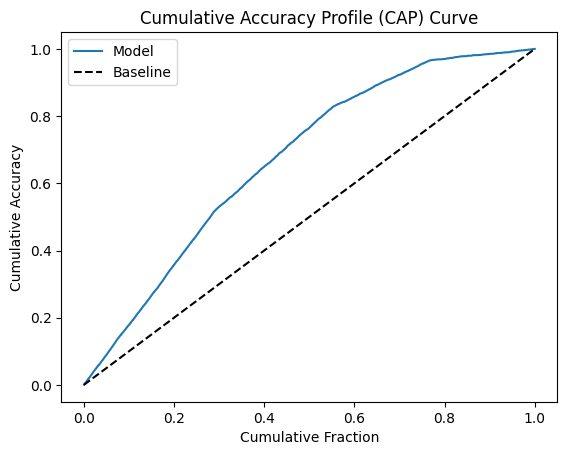

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have the predicted probabilities or scores named 'predicted_scores' and true labels named 'true_labels'

# Sort the scores and corresponding true labels
sorted_indices = np.argsort(y_pred)[::-1]
sorted_true_labels = y_test[sorted_indices]

# Calculate cumulative metrics
total_positive = np.sum(y_test)
cumulative_positives = np.cumsum(sorted_true_labels)
cumulative_accuracy = cumulative_positives / total_positive
cumulative_fraction = np.arange(1, len(sorted_true_labels) + 1) / len(sorted_true_labels)

# Create the CAP curve plot
plt.plot(cumulative_fraction, cumulative_accuracy, label='Model')
plt.plot([0, 1], [0, 1], 'k--', label='Baseline')
plt.xlabel('Cumulative Fraction')
plt.ylabel('Cumulative Accuracy')
plt.title('Cumulative Accuracy Profile (CAP) Curve')
plt.legend()
plt.show()